In [1]:
!pip install numpy pandas sentence-transformers scikit-learn matplotlib seaborn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.9 MB/s eta 0:00:00


In [7]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import inspect
import textwrap

model = SentenceTransformer('all-MiniLM-L6-v2')

In [12]:
def embedding_heatmap_demo(txt1,txt2,txt3,txt4) -> None:
    # Initialize the model


    texts = [txt1,txt2,txt3,txt4]
    embeddings = model.encode(texts)
    similarity_matrix = cosine_similarity(embeddings)

    #Plot heat map
    sns.set_context('talk')
    plt.figure(figsize=(8, 6))
    truncated_texts = [text[:20] for text in texts]
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=truncated_texts,
                yticklabels=truncated_texts,annot_kws={"size": 18, "weight": "bold"})
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)
    plt.title("Cosine Similarity Heatmap")
    plt.show()

    # Show embeddings
    df = pd.DataFrame(embeddings)
    df.insert(0, "Text", texts)
    return df


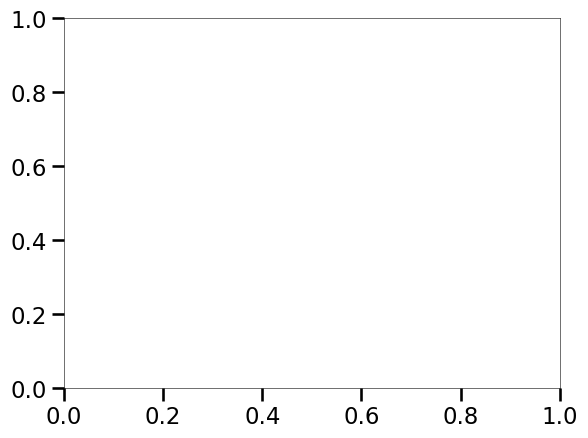

<Figure size 1200x480 with 0 Axes>

<Figure size 1200x480 with 0 Axes>

<Figure size 1200x480 with 0 Axes>

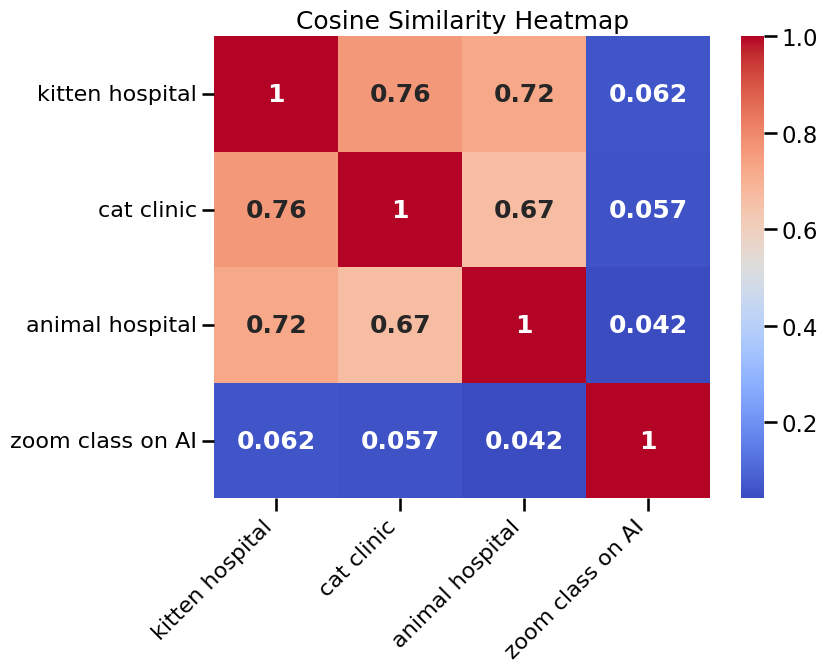

,Text,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,kitten hospital,0.021661,0.018094,-0.027057,0.003366,-0.043547,-0.040591,0.011032,-0.003710,0.028244,...,0.007305,0.077425,-0.005885,-0.006980,-0.016795,0.099056,0.076995,0.035938,0.077280,-0.002396
1,cat clinic,0.051444,0.011684,-0.016766,0.002608,-0.128093,-0.048432,0.020150,0.009883,0.003777,...,-0.026612,0.063220,0.062173,-0.058806,-0.017699,0.075992,0.048090,0.030862,0.019922,0.011086
2,animal hospital,-0.015588,-0.007607,0.018801,0.041310,-0.048473,-0.033561,-0.010295,-0.040401,0.056372,...,-0.027447,0.032504,0.012062,-0.034882,-0.061447,0.072667,0.050594,0.009370,0.062510,0.026341
3,zoom class on AI,-0.056398,-0.010136,-0.025286,-0.067635,0.015620,0.010560,0.100845,0.049785,-0.086850,...,0.009268,0.064815,0.060403,-0.096111,-0.047952,0.054709,-0.059405,0.079778,-0.130201,-0.026503


In [14]:
embedding_heatmap_demo("kitten hospital","cat clinic","animal hospital","zoom class on AI")